# Distribution of p-values for C code  
Verification of results of C implementations of KS, $\chi^2$ from batteries and additional code (KS proposed by Marsaglia). For each uniformity test $10^5$ random samples with various sample sizes [10, 100, 1000, 10000] are randomly selected from devurandom generated floats from (0,1). Then uniformity test was applied and $10^5$ saved into file **2nd_simulated&name&test_id&sample_size**.
- TODO: sample size 10000, test ids= 10, 13...  

In [ ]:
import json
import sys, time

sys.path.insert(1, "../../python")
from statistical_tests import GoF_pvals_wrapper
from names import GoF_test_ids, GoF_test_names

uniform_pvals_path = '/mnt/d/Data/batteries_testing/1st/ideal-devu/uniform_pvals_devurand.pval'
sample_sizes = [10000]
save_path = "/mnt/d/Data/batteries_testing/2nd/simulated/"
repetitions = 100000
for GoF_idx in GoF_test_ids[11:]:
    for sample_size in sample_sizes:
        filename = f"2nd_simulated&{GoF_test_names[GoF_idx]}&{GoF_idx}&{sample_size}"
        file_path = save_path + filename
        print(file_path)
        start = time.time()
        GoF_pvals_wrapper(src_pvals_filepath = uniform_pvals_path,
                          dst_pvals_filepath = file_path,
                          sample_size=sample_size, repetitions = repetitions + 200, GoF_idx = GoF_idx, seed=1)
        print(f"time={time.time()-start}" )
        with open(file_path) as f1:
            lines = f1.readlines()
    
        with open(file_path, 'w') as f2:
            f2.writelines(lines[:repetitions]) 


# Distribution of p-values for python code  
Verification of results of python tests. Analyzed were tests form scipy:
- KS (uniformity) 1 sample and 2 sample: **KS_scipy, KS_2samp_scipy**
- chi2 1 sample and 2 sample: **chisquare_scipy, chisquare_2sample_scipy**
- binomial test: **binom_scipy, binom_as_normal_scipy**

For each uniformity test $10^5$ random samples with various sample sizes [10, 100, 1000, 10000] are randomly selected from devurandom generated floats from (0,1). Then uniformity test was applied and $10^5$ saved into file **2nd_simulated&name&test_id&sample_size**.

TODO: all except chisquare_scipy, KS_scipy


In [19]:
import random, sys
from collections import defaultdict
sys.path.insert(1, "../../python")
from statistical_tests import KS_scipy, chisquare_scipy
from histograms import histogram_sorted
from utils import read_pvalues
uniform_pvals_path = '/mnt/d/Data/batteries_testing/1st/ideal-devu/uniform_pvals_devurand.pval'
pvals_1stlvl = read_pvalues(uniform_pvals_path) 

save_path = "/mnt/d/Data/batteries_testing/2nd/simulated/"
repetitions = 100000
sample_sizes = [10, 100, 1000, 10000]

names = ['KS_greater', 'KS_less', 'KS_both','chi2_&10&bins', 'chi2_&100&bins', 'chi2_&1000&bins',
         'binom_greater', 'binom_less', 'binom_both',
         ]
datasets = defaultdict(list)

for sample_size in sample_sizes:
    print(f"sample_size={sample_size}")
    for _ in range(10**5):
       
        sample = random.choices(pvals_1stlvl, k=sample_size)
        
        filename = f"2nd_simulated&scipy_KS_greater&17&{sample_size}"
        datasets[filename].append(KS_scipy(sample, alternative='greater').pvalue)
        
        filename = f"2nd_simulated&scipy_KS_less&18&{sample_size}"
        datasets[filename].append(KS_scipy(sample, alternative='less').pvalue)
        
        filename = f"2nd_simulated&scipy_KS_both&19&{sample_size}"
        datasets[filename].append( KS_scipy(sample, alternative='two-sided').pvalue)
  
        sample_sorted = sorted(sample)      
        for num_bins in [10, 100, 1000]:
            if sample_size // num_bins < 10:
                continue
            hist = histogram_sorted(sample_sorted, num_bins=num_bins)
            filename = f"2nd_simulated&scipy_chi2&{20}&{sample_size}&{num_bins}"
            datasets[filename].append(chisquare_scipy(f_obs = list(hist.values())).pvalue)

for filename in datasets:
    file_path = save_path + filename
    pvals = datasets[filename]
    with open(file_path, 'w') as f:
        f.writelines( '\n'.join(map(str, pvals)) + '\n')
        

sample_size=10
sample_size=100
sample_size=1000
sample_size=10000


# Distribution of 1st level (extraction of data)


In [1]:
import random, sys, math, json
from collections import defaultdict, namedtuple
sys.path.insert(1, "../../python")
from utils import results_traverse, read_pvalues, custom_log, data_to_csv
from statistical_tests import KS_scipy, chisquare_scipy
from histograms import histogram_sorted, bin_frequency
from names import extract_from_path

In [2]:
pvals_path = '/mnt/d/Data/batteries_testing/1st/'
# save_path = "/mnt/d/Data/batteries_testing/2nd/simulated/"
chi2_num_bins = [10, 100, 1000, 10000]

chi2 = [f"chi2_{math.log10(num_bins)}" for num_bins in  chi2_num_bins]
log_chi2 = [f"log_{item}" for item in chi2]

absolute_left_tails = [f"L_{e}" for e in range(1, 10)][::-1]
absolute_right_tails = [f"R_{e}" for e in range(1, 10)]
relative_left_tails = [f"l_{e}" for e in range(1, 10)][::-1]
relative_right_tails = [f"r_{e}" for e in range(1, 10)]

log_relative_left_tails = [f"log_{item}" for item in relative_left_tails]
log_relative_right_tails = [f"log_{item}" for item in relative_right_tails]

atributes = ['bat','subb', 'test', 'id','num_pvals', 'unique','ratio', 'min', 'max', 'KS', 'log_KS'] 
atributes += chi2 + log_chi2 + absolute_left_tails + ['num_pvals2'] + absolute_right_tails
atributes += relative_left_tails + relative_right_tails + log_relative_left_tails + log_relative_right_tails

exps_backward = [9,8,7,6,5,4,3,2,1]
exps_forward = exps_backward[::-1]
print(atributes)
# Extracted_values = namedtuple('Extracted_values', atributes)

['bat', 'subb', 'test', 'id', 'num_pvals', 'unique', 'ratio', 'min', 'max', 'KS', 'log_KS', 'chi2_1.0', 'chi2_2.0', 'chi2_3.0', 'chi2_4.0', 'log_chi2_1.0', 'log_chi2_2.0', 'log_chi2_3.0', 'log_chi2_4.0', 'L_9', 'L_8', 'L_7', 'L_6', 'L_5', 'L_4', 'L_3', 'L_2', 'L_1', 'num_pvals2', 'R_1', 'R_2', 'R_3', 'R_4', 'R_5', 'R_6', 'R_7', 'R_8', 'R_9', 'l_9', 'l_8', 'l_7', 'l_6', 'l_5', 'l_4', 'l_3', 'l_2', 'l_1', 'r_1', 'r_2', 'r_3', 'r_4', 'r_5', 'r_6', 'r_7', 'r_8', 'r_9', 'log_l_9', 'log_l_8', 'log_l_7', 'log_l_6', 'log_l_5', 'log_l_4', 'log_l_3', 'log_l_2', 'log_l_1', 'log_r_1', 'log_r_2', 'log_r_3', 'log_r_4', 'log_r_5', 'log_r_6', 'log_r_7', 'log_r_8', 'log_r_9']


In [8]:
rows = []
c = 0
pvals_path = '/mnt/d/Data/batteries_testing/1st/ideal-devu'
for path in results_traverse(pvals_path):
    pvals = read_pvalues(path)
    pvals_sorted = sorted(pvals)
    res = []
    print(path) 
    names = extract_from_path(path)
    res += list(names)
    num_pvals = len(pvals) 
    unique = len(set(pvals_sorted))
    ratio = round(num_pvals/unique)
    min_pval, max_pval = pvals_sorted[0], pvals_sorted[-1]
    res += [num_pvals, unique,ratio, min_pval, max_pval] 
    print([num_pvals, unique,ratio, min_pval, max_pval])
    KS_pvalue = KS_scipy(pvals_sorted).pvalue
    res += [KS_pvalue, custom_log(KS_pvalue, round_to=1)]
    print([KS_pvalue, custom_log(KS_pvalue, round_to=1)])
    chi2_pvals = [None]*len(chi2_num_bins)
    for i in range(len(chi2_num_bins)):
        num_bins = chi2_num_bins[i]
        if num_pvals / num_bins >= 0:
            hist = histogram_sorted(pvals_sorted, num_bins=num_bins, domain = (0,1))
            chi2_pvals[i] = chisquare_scipy(f_obs=list(hist.values())).pvalue 
    chi2_pvals_logs = [custom_log(chi2pval, round_to=1) for chi2pval in chi2_pvals]
    res += chi2_pvals + chi2_pvals_logs
    
    absolute_left_tails = [bin_frequency(pvals_sorted, interval=(0, 10**(-e)), interval_type="[]" ) for e in exps_backward]
    absolute_right_tails = [bin_frequency(pvals_sorted, interval=(1-10**(-e),1), interval_type="[]" ) for e in exps_forward]
    absolute_tails = absolute_left_tails + absolute_right_tails
    res += absolute_left_tails + [num_pvals] + absolute_right_tails
    relative_tails = [round(abs_freq*10**(exp)/num_pvals,1) for abs_freq,exp in zip(absolute_tails, exps_backward+exps_forward)]
    res += relative_tails
    relative_tails_logs = [custom_log(relative_tail, round_to=1) for relative_tail in relative_tails]
    res += relative_tails_logs
    # print(res)
    rows.append(res)
    # c+= 1
    # if c % 10 == 0:
data_to_csv(header= atributes, rows=rows, filename_csv='../../../data/excel/1st_extracted.csv', 
    filename_table = '../../../data/table/1st_extracted.txt')

res = {'header':atributes, 'rows': rows}
json.dump(res, open('../../../data/json/1st_extracted.json', 'w'))
# print(dict(zip(atributes,res)))
data_to_csv(header= atributes, rows=rows, filename_csv='../../../data/excel/1st_extracted.csv', 
            filename_table = '../../../data/table/1st_extracted.txt')

res = {'header':atributes, 'rows': rows}
json.dump(res, open('../../../data/json/1st_extracted.json', 'w'))

/mnt/d/Data/batteries_testing/1st/ideal-devu/virtual(0)_uniform_pvals_devurand.pval
['virtual', '', '_uniform_pvals_devurand', '000|000|000']
[1.621e-07, 2.345e-07, 2.775e-07, 4.317e-07, 5.655e-07, 7.248e-07, 7.998e-07, 8.116e-07, 8.522e-07, 9.129e-07] [0.9999983828, 0.9999986272, 0.9999987676, 0.9999988708, 0.9999989497, 0.9999990938, 0.9999991741, 0.9999996505, 0.9999997474, 0.9999999774]
[10000000, 9988412, 1, 1.621e-07, 0.9999999774]
[0.2791475933961282, -0.6]
{0.0: 1000116, 0.1: 999942, 0.2: 1000270, 0.3: 1001457, 0.4: 999599, 0.5: 999625, 0.6: 999790, 0.7: 998855, 0.8: 999750, 0.9: 1000596}
{0.0: 99740, 0.01: 100310, 0.02: 100636, 0.03: 99813, 0.04: 100227, 0.05: 99879, 0.06: 100337, 0.07: 100084, 0.08: 99416, 0.09: 99674, 0.1: 100371, 0.11: 99964, 0.12: 100039, 0.13: 100000, 0.14: 99927, 0.15: 100024, 0.16: 99800, 0.17: 99678, 0.18: 100117, 0.19: 100022, 0.2: 100290, 0.21: 100167, 0.22: 100035, 0.23: 100241, 0.24: 100302, 0.25: 99793, 0.26: 99568, 0.27: 99921, 0.28: 99928, 0.29:

# 1st Images and

In [7]:
import random, sys, math, json
from collections import defaultdict, namedtuple
sys.path.insert(1, "../../python")
from utils import results_traverse, read_pvalues, custom_log, data_to_csv
from statistical_tests import KS_scipy, chisquare_scipy
from histograms import histogram_sorted, bin_frequency, select_equiv
from names import extract_from_path

In [8]:
pvals_path = '/mnt/d/Data/batteries_testing/1st/'
res = defaultdict(dict)
for path in results_traverse(pvals_path):
    print(path)
    row = []
    names = extract_from_path(path)

    pvals = read_pvalues(path)
    pvals_sorted = sorted(pvals)
    key = ','.join(names)
    hist = histogram_sorted(pvals_sorted, num_bins=10, domain = (0,1))
    res[key]['10 hist'] =  dict(zip(list(map(float,hist.keys())), list(map(int,hist.values()))))
    res[key]['10 select'] = list(map(float, select_equiv(pvals, 10, values = True)))
    hist = histogram_sorted(pvals_sorted, num_bins=100, domain = (0,1))
    res[key]['100 hist'] =  dict(zip(list(map(float,hist.keys())), list(map(int,hist.values()))))
    res[key]['100 select'] = list(map(float, select_equiv(pvals, 100, values = True)))
    hist = histogram_sorted(pvals_sorted, num_bins=1000, domain = (0,1))
    res[key]['1000 hist'] =  dict(zip(list(map(float,hist.keys())), list(map(int,hist.values()))))
    res[key]['1000 select'] = list(map(float, select_equiv(pvals, 1000, values = True)))
    

json.dump(res, open('../../../data/json/1st_histograms.json', 'w'))

/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(0) Diehard Birthdays Test.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(1) Diehard OPERM5 Test.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(10) Diehard Parking Lot Test.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(100) STS Monobit Test.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(101) STS Runs Test.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(102) STS Serial Test (Generalized) Subtest 1.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(102) STS Serial Test (Generalized) Subtest 10.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(102) STS Serial Test (Generalized) Subtest 11.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(102) STS Serial Test (Generalized) Subtest 12.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(102) STS Serial Test (Generalized) Subtest 13.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(102) STS

# Distribution of 1st level (extraction for fix)
Find intervals of 1st level p-values with equal length.  


In [1]:
import random, sys, math, json
from collections import defaultdict, namedtuple
sys.path.insert(1, "../../python")
from utils import results_traverse, read_pvalues, custom_log, data_to_csv
from statistical_tests import KS_scipy, chisquare_scipy
from histograms import histogram_sorted, bin_frequency, find_equal_bins
from names import extract_from_path

In [ ]:
pvals_path = '/mnt/d/Data/batteries_testing/1st/'
depths = range(3, 11)
depths = [10]
res = dict(zip(depths, [{}]*len(depths)))
rows = []
attributes = ['depth', 'bat', 'subb', 'test', 'id', 'num_pvals', 'unique', 'ratio'] 
for depth in depths:
    attributes  += [f"min{2**depth}", f"max{2**depth}"]
print(attributes)
for path in results_traverse(pvals_path):
    print(path)
    row = []
    names = extract_from_path(path)
    row += names
    for depth in depths:
        pvals = read_pvalues(path)
        pvals_sorted = sorted(pvals)
        
        num_pvals = len(pvals) 
        unique = len(set(pvals_sorted))
        ratio = round(num_pvals/unique)
        row += [num_pvals, unique, ratio]
        if ratio < 10 or unique < 2**depth:
            res[depth][names] = [-1]*(len(attributes) - len(row))
            row += [-1, -1]
        else:       
            limits = find_equal_bins(pvals_sorted, depth=depth)
            hist = histogram_sorted(pvals_sorted, limits=limits)
            freqs = list(hist.values())
            min_freq, max_freq = min(freqs), max(freqs)
            row += [min_freq, max_freq]
            res[depth][names] = hist 
        rows += row
        
data_to_csv(header= atributes, rows=rows, filename_csv='../../../data/excel/1st_equal_histograms.csv', 
    filename_table = '../../../data/table/1st_equal_histograms.txt')

json.dump(res, open('../../../data/json/1st_equal_histograms.json', 'w'))


['depth', 'bat', 'subb', 'test', 'id', 'num_pvals', 'unique', 'ratio', 'min1024', 'max1024']
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(0) Diehard Birthdays Test.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(1) Diehard OPERM5 Test.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(10) Diehard Parking Lot Test.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(100) STS Monobit Test.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(101) STS Runs Test.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(102) STS Serial Test (Generalized) Subtest 1.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(102) STS Serial Test (Generalized) Subtest 10.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(102) STS Serial Test (Generalized) Subtest 11.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(102) STS Serial Test (Generalized) Subtest 12.pval
/mnt/d/Data/batteries_testing/1st/dieharder/Dieharder(102) STS Serial Test

[(0, 'bat'), (1, 'subb'), (2, 'test'), (3, 'id'), (4, 'num_pvals'), (5, 'unique'), (6, 'ratio'), (7, 'min'), (8, 'max'), (9, 'KS'), (10, 'log_KS'), (11, 'chi2_1.0'), (12, 'chi2_2.0'), (13, 'chi2_3.0'), (14, 'chi2_4.0'), (15, 'log_chi2_1.0'), (16, 'log_chi2_2.0'), (17, 'log_chi2_3.0'), (18, 'log_chi2_4.0'), (19, 'L_9'), (20, 'L_8'), (21, 'L_7'), (22, 'L_6'), (23, 'L_5'), (24, 'L_4'), (25, 'L_3'), (26, 'L_2'), (27, 'L_1'), (28, 'num_pvals2'), (29, 'R_1'), (30, 'R_2'), (31, 'R_3'), (32, 'R_4'), (33, 'R_5'), (34, 'R_6'), (35, 'R_7'), (36, 'R_8'), (37, 'R_9'), (38, 'l_9'), (39, 'l_8'), (40, 'l_7'), (41, 'l_6'), (42, 'l_5'), (43, 'l_4'), (44, 'l_3'), (45, 'l_2'), (46, 'l_1'), (47, 'r_1'), (48, 'r_2'), (49, 'r_3'), (50, 'r_4'), (51, 'r_5'), (52, 'r_6'), (53, 'r_7'), (54, 'r_8'), (55, 'r_9'), (56, 'log_l_9'), (57, 'log_l_8'), (58, 'log_l_7'), (59, 'log_l_6'), (60, 'log_l_5'), (61, 'log_l_4'), (62, 'log_l_3'), (63, 'log_l_2'), (64, 'log_l_1'), (65, 'log_r_1'), (66, 'log_r_2'), (67, 'log_r_3'), 

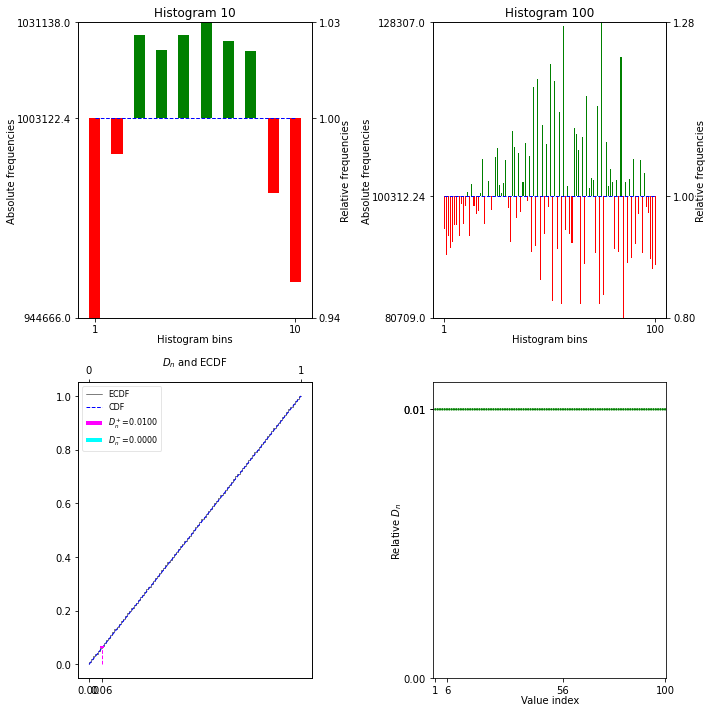

x[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.8989

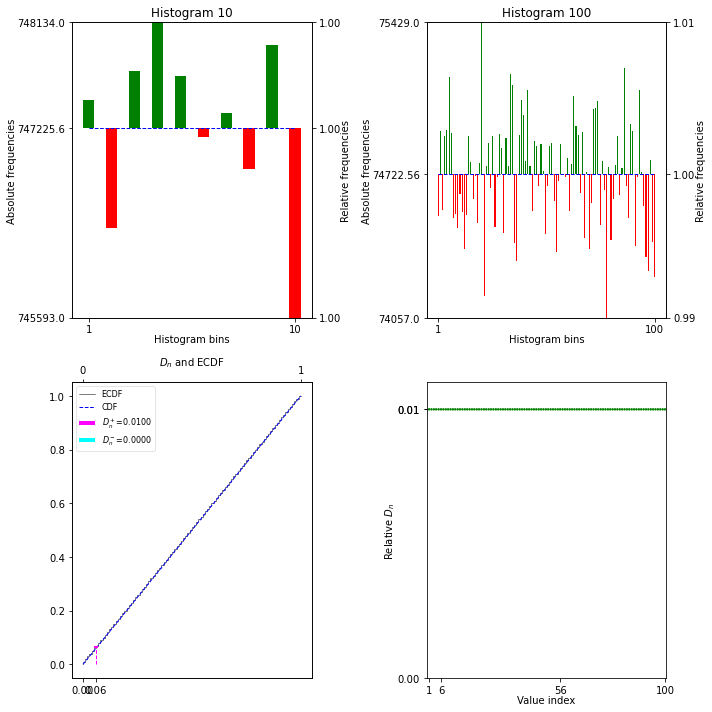

x[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.8989

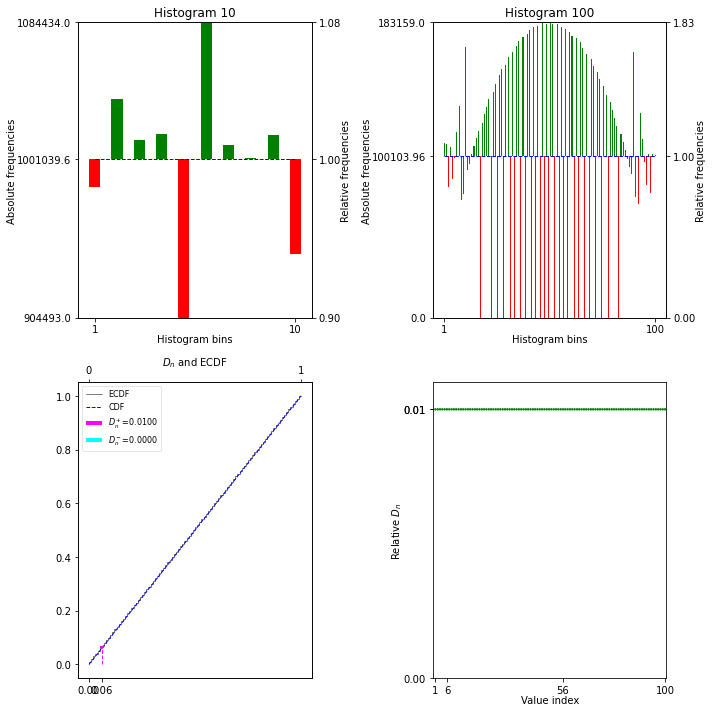

x[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.8989

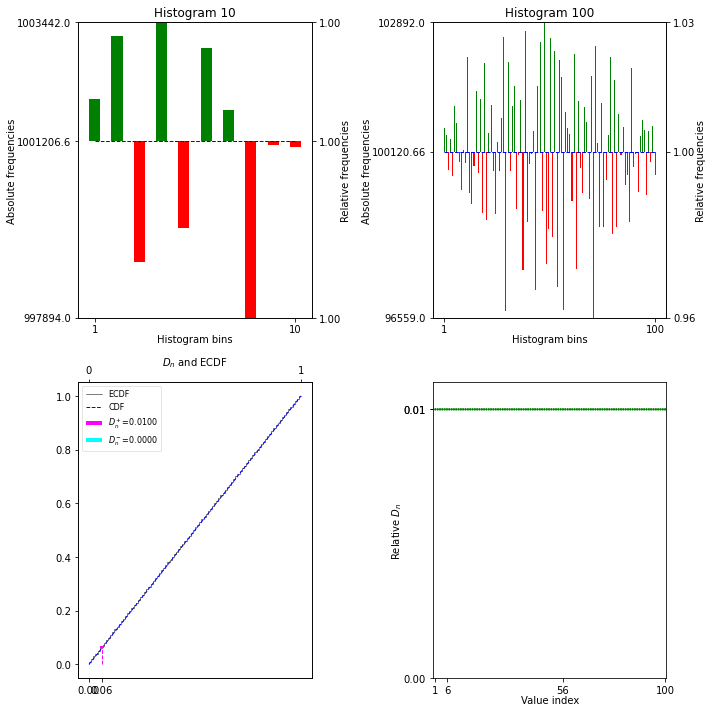

x[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.8989

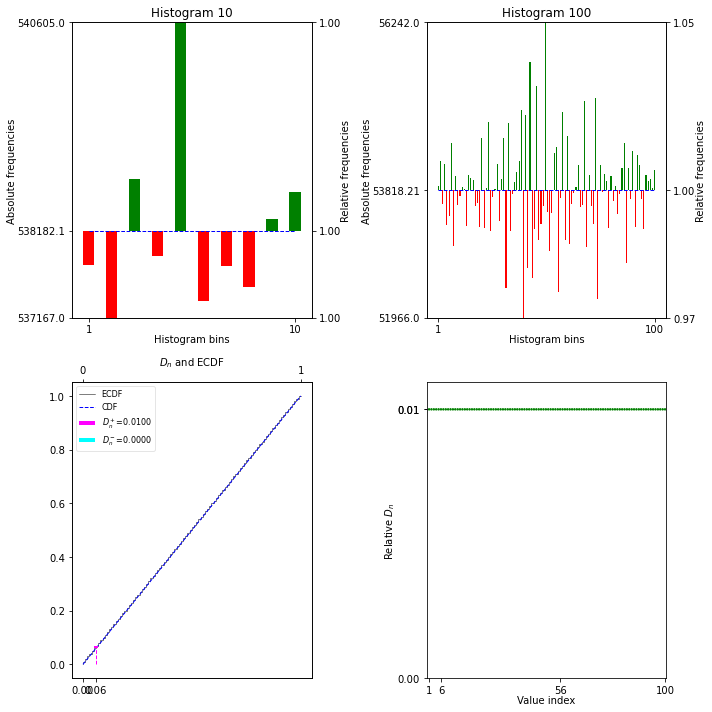

x[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.8989

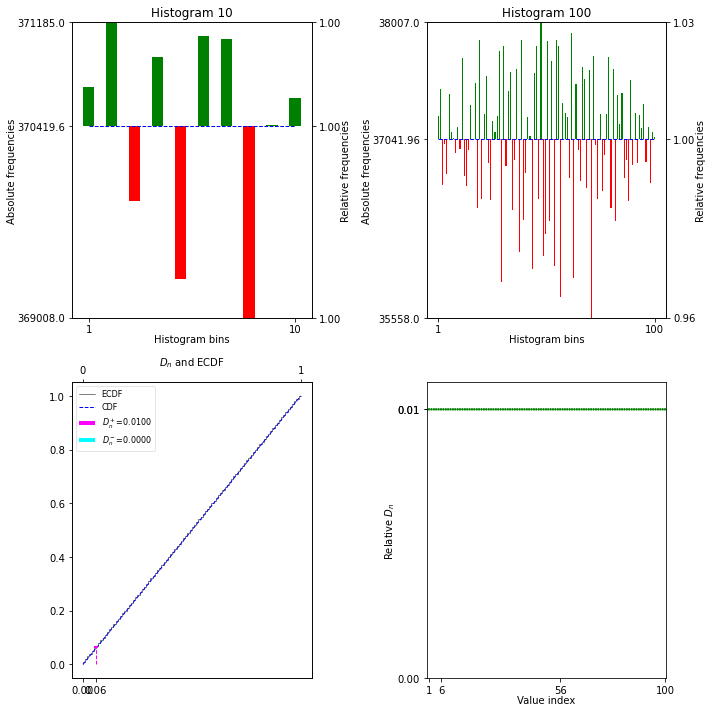

x[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.8989

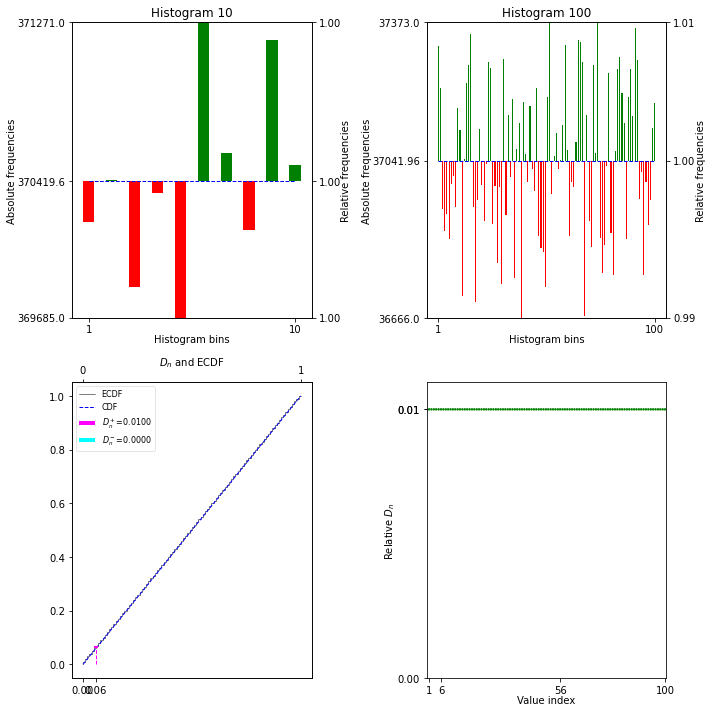

x[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.8989

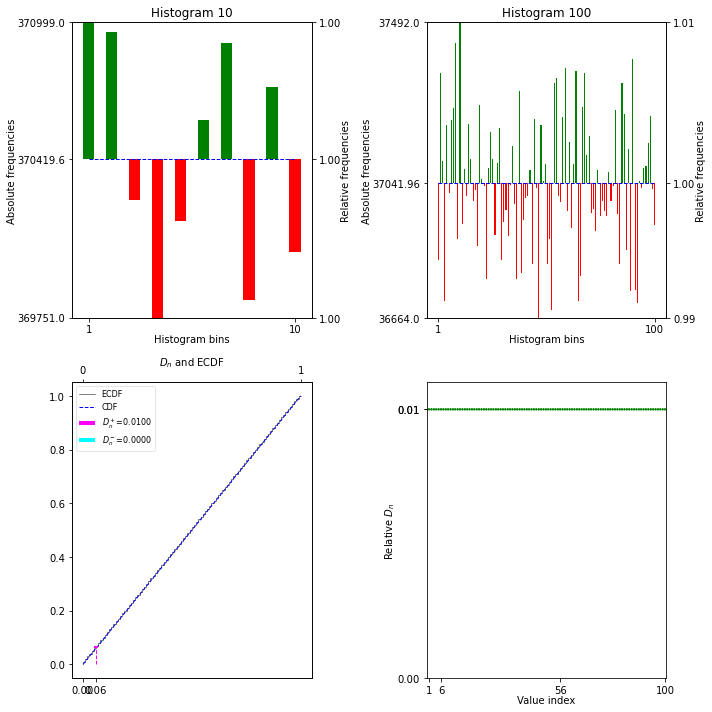

x[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.8989

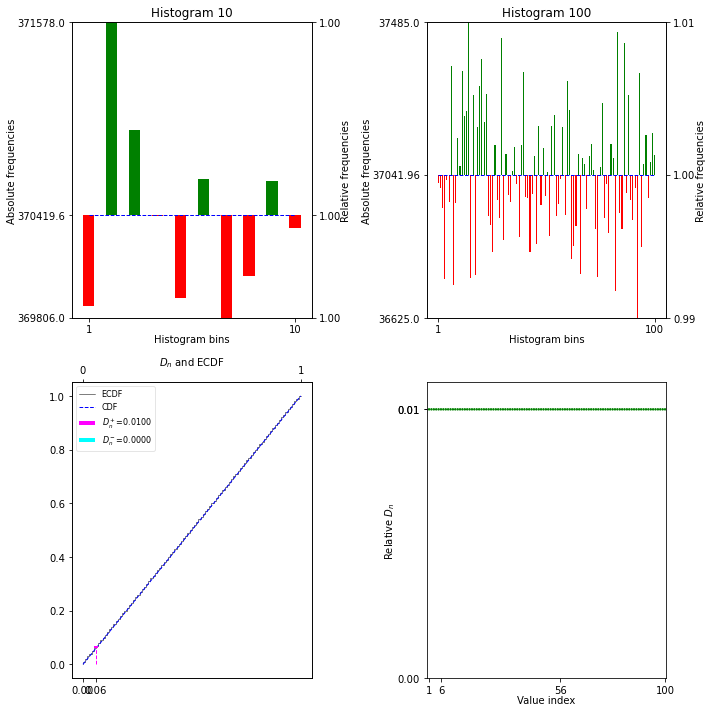

x[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.8989

KeyboardInterrupt: 

In [26]:
sys.path.insert(1, "../../python")
import numpy as np
import matplotlib.pyplot as plt
from images import draw_hist,draw_ECDF, draw_KS_relative, draw_tails

extracted = json.load(open('../../../data/json/1st_extracted.json', 'r'))
histograms = json.load(open('../../../data/json/1st_histograms.json', 'r'))
header = extracted['header']
print(list(zip(range(len(header)), header)))
for row in extracted['rows']:
    key = ','.join(row[:4])
    fig, axs = plt.subplots(2, 2)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    
    hist10 = histograms[key]["10 hist"]
    hist100 = histograms[key]["100 hist"]
    freqs10 = list(hist10.values())
    freqs100 = list(hist100.values())
    pvals10 = list(map(float, hist10.keys()))
    pvals100 = list(map(float, hist100.keys()))
    extracted_n = row[4]

    # left_tails = 
    # right_tails = 
    # bar histogram
    draw_hist(freqs=freqs10, expected_freq=extracted_n/10, axis=axs[0][0], text="Histogram 10")
    draw_hist(freqs=freqs100, expected_freq=extracted_n/100, axis=axs[0][1], text="Histogram 100")
    draw_ECDF(values=pvals100, axis=axs[1][0], label="$D_n$ and ECDF")
    draw_KS_relative(values=pvals100, axis=axs[1][1], text="Uniform(0, 1)")
    # draw_tails(tails=tails, axis=axs[1][1], text="tails")
    # draw_tails(tails=tails, axis=axs[1][1], text="tails")

    fig.tight_layout()
    plt.show()
        

# json.load(open('../../../data/json/1st_equal_histograms.json', 'w'))